In [2]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [11]:
# Path to dataset: structured as "dataset/A/A1.jpg", "dataset/B/B2.jpg", etc.
DATASET_PATH = "C:/Users/johnsoml/Python/asl_dataset"  #Replace with your dataset path
IMAGE_SIZE = (100, 100)

def load_images_and_labels(dataset_path):
    X = []
    y = []
    for label in sorted(os.listdir(dataset_path)):
        label_path = os.path.join(dataset_path, label)
        if not os.path.isdir(label_path):
            continue
        for img_name in os.listdir(label_path):
            img_path = os.path.join(label_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue
            img = cv2.resize(img, IMAGE_SIZE)
            edges = cv2.Canny(img, 100, 200)
            X.append(edges.flatten())
            y.append(label)
    return np.array(X), np.array(y)

# Load data
print("Loading images...")
X, y = load_images_and_labels(DATASET_PATH)

Loading images...


In [18]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

# Train KNN classifier
print("Training classifier...")
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Evaluate
print("Evaluating...")
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))

Training classifier...
Evaluating...
              precision    recall  f1-score   support

           a       0.78      0.78      0.78         9
           b       0.94      0.94      0.94        18
           c       0.79      0.79      0.79        19
           d       0.87      0.87      0.87        15
           e       1.00      0.36      0.53        14
           f       1.00      0.92      0.96        12
           g       0.91      0.77      0.83        13
           h       1.00      0.67      0.80         6
           i       1.00      0.57      0.73        14
           j       1.00      0.77      0.87        13
           k       0.66      1.00      0.79        19
           l       0.94      0.79      0.86        19
           m       1.00      0.67      0.80         6
           n       1.00      0.67      0.80         9
           o       0.43      0.90      0.58        10
           p       0.23      1.00      0.38        14
           q       1.00      0.81      0.90 

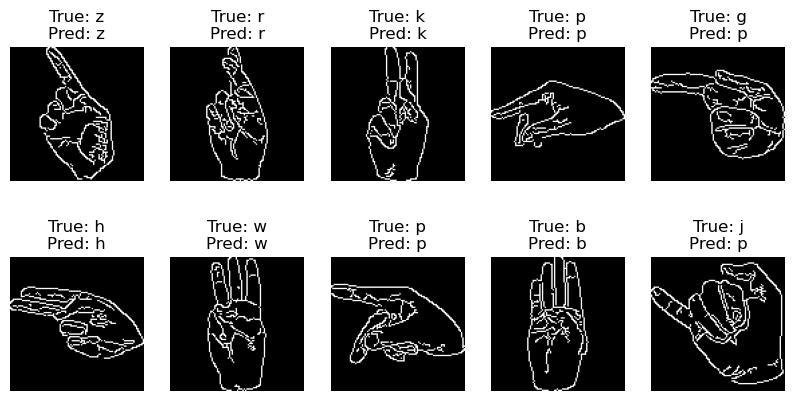

In [38]:
# Show some examples
def show_examples(images, labels, preds=None):
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        edge_img = images[i].reshape(IMAGE_SIZE)
        plt.imshow(edge_img, cmap='gray')
        title = f"True: {labels[i]}"
        if preds is not None:
            title += f"\nPred: {preds[i]}"
        plt.title(title)
        plt.axis('off')
    #plt.tight_layout()
    plt.ion()
    plt.show()

show_examples(X_test, y_test, y_pred)

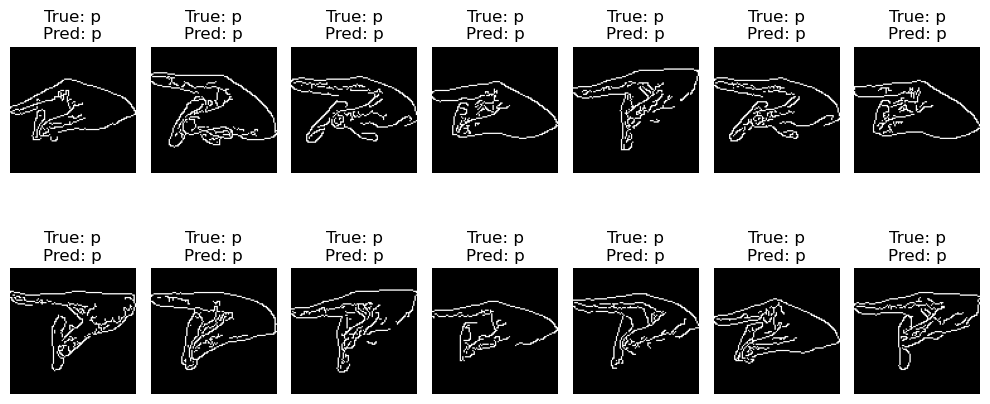

In [27]:
# Pick out indices where y_test is 'P'
indices = [i for i, label in enumerate(y_test) if (label == 'p')]

# Extract images and predictions for these indices
asl_images_p = X_test[indices]
true_labels_p = [y_test[i] for i in indices]
pred_labels_p = [y_pred[i] for i in indices]


show_examples(asl_images_p, true_labels_p, pred_labels_p)

In [39]:
import matplotlib.pyplot as plt
import os

def show_and_save_examples(images, labels, preds=None, save_dir="asl_predictions", image_size=(28, 28)):
    # Create directory if it doesn't exist
    os.makedirs(save_dir, exist_ok=True)

    for i in range(len(images)):
        plt.figure(figsize=(2, 2))
        edge_img = images[i].reshape(image_size)
        plt.imshow(edge_img, cmap='gray')

        title = f"True: {labels[i]}"
        if preds is not None:
            title += f" | Pred: {preds[i]}"
        plt.title(title)
        plt.axis('off')

        # Save each image
        filename = f"{save_dir}/example_{i}.png"
        plt.savefig(filename, bbox_inches='tight')
        plt.close()  # Close the figure to avoid memory issues

    print(f"Saved {len(images)} examples to '{save_dir}'")

# Example usage
show_and_save_examples(X_test, y_test, y_pred, image_size=IMAGE_SIZE)


Saved 363 examples to 'asl_predictions'
